/afs/crc.nd.edu/user/m/mcarlozo/.conda/envs/Toy_Problem_env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Date and Time:  28-Jul-2022 (17:04:25)
Runs: 2
BO Iters: 2
Number of Separation Factors Tested: 2
----------------------------------------------------
Separation Factor Train/Test: 0.5
Lengthscale Set To: [None]
Initial Explore Bias: 0.75
Run Number:  1


/afs/crc.nd.edu/user/m/mcarlozo/.conda/envs/Toy_Problem_env/lib/python3.9/site-packages/gpytorch/lazy/triangular_lazy_tensor.py:130: UserWarning: torch.triangular_solve is deprecated in favor of torch.linalg.solve_triangularand will be removed in a future PyTorch release.
torch.linalg.solve_triangular has its arguments reversed and does not return a copy of one of the inputs.
X = torch.triangular_solve(B, A).solution
should be replaced with
X = torch.linalg.solve_triangular(A, B). (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:1672.)
  res = torch.triangular_solve(right_tensor, self.evaluate(), upper=self.upper).solution


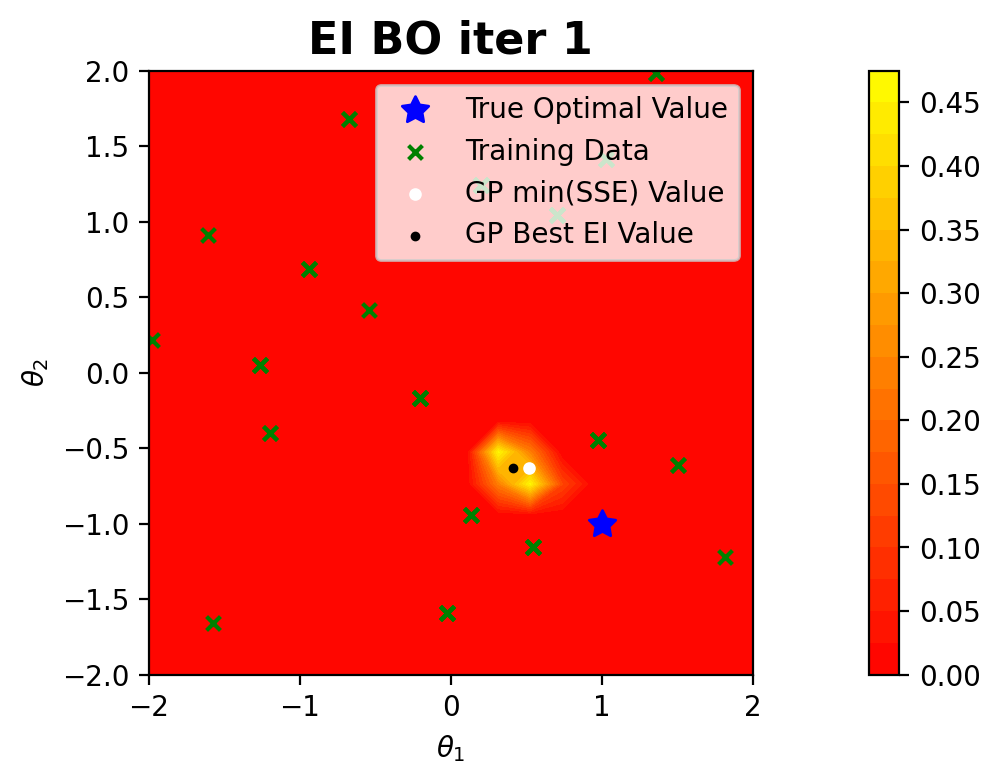

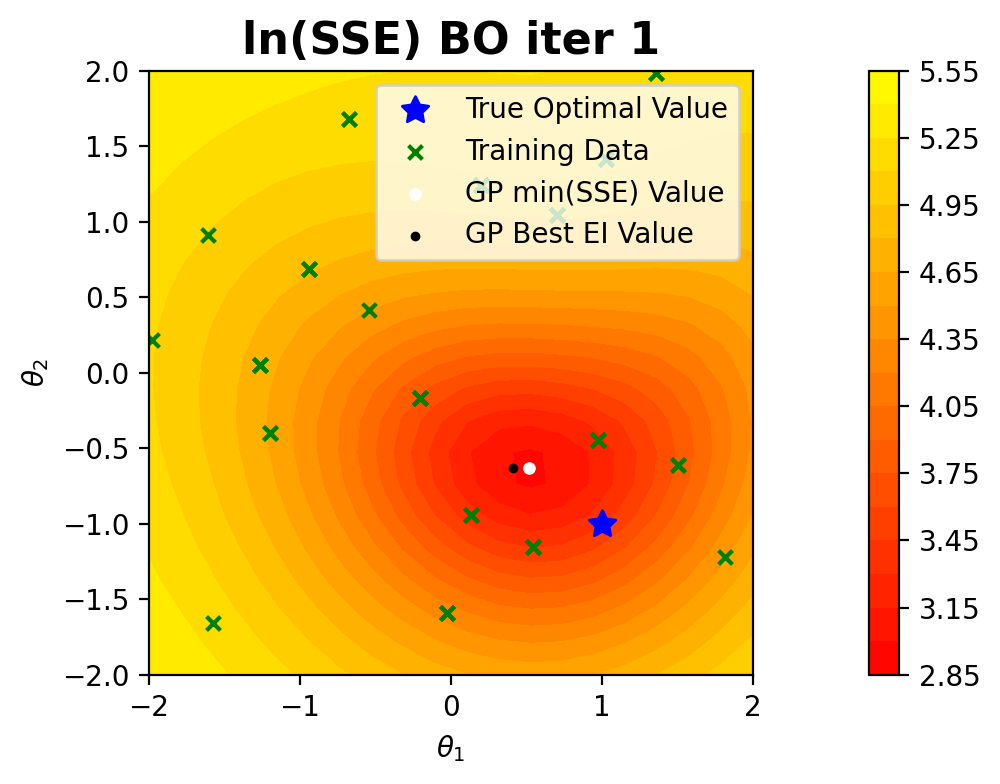

KeyboardInterrupt: 

In [1]:
import numpy as np
import pandas as pd
import torch
from bo_functions import bo_iter_w_runs
from bo_functions import find_train_doc_path
import matplotlib as mpl
from datetime import datetime
mpl.rcParams['figure.dpi'] = 200

#Set Date and Time
dateTimeObj = datetime.now()
timestampStr = dateTimeObj.strftime("%d-%b-%Y (%H:%M:%S)")
print("Date and Time: ", timestampStr)
# DateTime = dateTimeObj.strftime("%Y/%m/%d/%H-%M-%S%p")
DateTime = None ##For Testing

#Set Parameters
Theta_True = np.array([1,-1])
BO_iters = 2
train_iter = 300
noise_std = 0.1
runs = 2
explore_bias = torch.tensor([0.75])
shuffle_seed = 9
set_lengthscale = np.array([None])
t= 100

obj = "obj"
emulator = True
sparse_grid = True
verbose = False
save_fig=False

#Pull Experimental data from CSV
exp_data_doc = 'Input_CSVs/Exp_Data/n=5.csv'
exp_data = np.array(pd.read_csv(exp_data_doc, header=0,sep=","))
Xexp = exp_data[:,1]
Yexp = exp_data[:,2]
n = len(Xexp)

#Define GP Testing space
p=20
Theta1 =  np.linspace(-2,2,p) #1x10
Theta2 =  np.linspace(-2,2,p) #1x10
theta_mesh = np.array(np.meshgrid(Theta1, Theta2)) #2 Uniform 5x5 arrays

#Define GP Testing space
p=20
Theta1 =  np.linspace(-2,2,p) #1x10
Theta2 =  np.linspace(-2,2,p) #1x10
theta_mesh = np.array(np.meshgrid(Theta1, Theta2)) #2 Uniform 5x5 arrays

all_data_doc = find_train_doc_path(emulator, obj, t)
all_data = np.array(pd.read_csv(all_data_doc, header=0,sep=",")) 

sep_fact = np.linspace(0.5,0.99,2)
# sep_fact = 0.8

print("Runs:", runs)
print("BO Iters:", BO_iters)
print("Number of Separation Factors Tested:", len(sep_fact))
print("----------------------------------------------------")
for i in range(len(sep_fact)):
    print("Separation Factor Train/Test:", str(np.round(sep_fact[i],3)))
    print("Lengthscale Set To:", set_lengthscale)
    print("Initial Explore Bias:", str(np.round(float(explore_bias[0]),3)))
    results = bo_iter_w_runs(BO_iters,all_data_doc,t,theta_mesh,Theta_True,train_iter,explore_bias[0], Xexp, Yexp,
                                 noise_std, obj, runs, sparse_grid, emulator, set_lengthscale[0], verbose, 
                                 save_fig, shuffle_seed, DateTime, sep_fact = sep_fact[i])
    print("The GP predicts the lowest SSE of", "{:.3e}".format(np.exp(results[3])), "occurs at \u03B8 =", results[2][0], 
              "during run", results[1], "at BO iteration", results[0])
    print("At this point, the highest EI occurs at \u03B8 =", results[4][0])
    print("\n")